<a href="https://colab.research.google.com/github/beejhay31/Face-Detection-with-OpenCV-using-custom-black-faces-dataset/blob/main/Black_Faces_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
import cv2
import zipfile
import numpy as np
 
faces = {}
with zipfile.ZipFile("/content/drive/MyDrive/Datasets/Faces.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".jpg"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8),cv2.IMREAD_GRAYSCALE)


In [ ]:
names=list(faces.keys())

In [ ]:
images=list(faces.values())
images

[array([[192, 197, 190, ..., 202, 202, 202],
        [190, 192, 188, ..., 202, 202, 202],
        [187, 188, 187, ..., 202, 202, 202],
        ...,
        [137, 141, 149, ..., 199, 191, 188],
        [145, 144, 146, ..., 198, 200, 201],
        [152, 150, 152, ..., 189, 195, 197]], dtype=uint8),
 array([[107, 122, 114, ...,  19,  20,  13],
        [114, 110, 117, ...,  10,  17,  13],
        [111, 116, 117, ...,   8,   2,   4],
        ...,
        [ 58,  66,  56, ...,   4,  15,   9],
        [ 73,  57,  47, ...,  12,   4,  10],
        [ 61,  54,  58, ...,  10,  10,   8]], dtype=uint8),
 array([[127, 127, 127, ...,  72,  72,  70],
        [130, 130, 131, ...,  72,  78,  76],
        [127, 127, 128, ...,  66,  74,  78],
        ...,
        [125, 125, 125, ...,   5,   5,   4],
        [124, 124, 124, ...,  15,  15,  15],
        [123, 124, 124, ...,  32,  33,  33]], dtype=uint8),
 array([[61, 60, 60, ..., 63, 63, 62],
        [60, 60, 60, ..., 63, 63, 62],
        [59, 60, 61, ..., 63

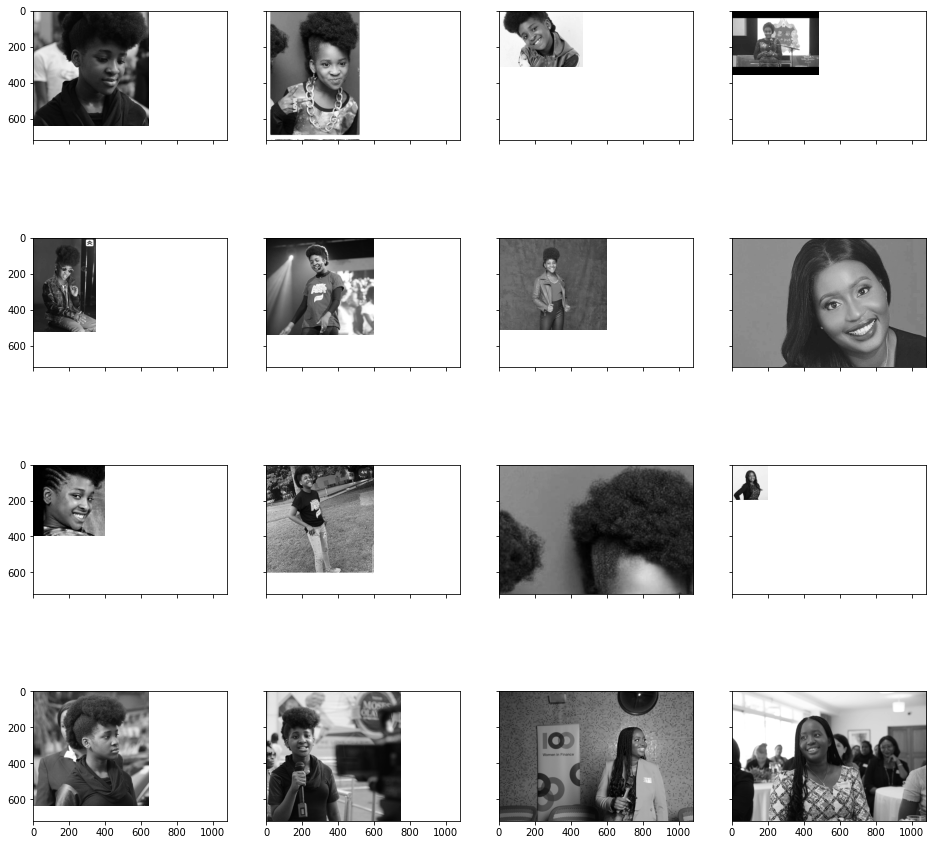

In [ ]:
...
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(16,16))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap='gray')
plt.show()


In [ ]:
images[0].shape

(900, 900)

In [ ]:
frontal_cascade_path=cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
profile_cascade_path=cv2.data.haarcascades + "haarcascade_profileface.xml"

In [ ]:
class FaceDetector():
  
  def __init__(self,faceCascadePath):
    self.faceCascade=cv2.CascadeClassifier(faceCascadePath)
        
  def detectFace(self, image, scaleFactor=1.4,
               minNeighbors=4,
               minSize=(30,30)):
        
        #function return rectangle coordinates of faces for given image
      rects=self.faceCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
      return rects

In [ ]:
class ProfileDetector():
  def __init__(self,profileCascadePath):
    self.profileCascade=cv2.CascadeClassifier(profileCascadePath)
    
  def detectProfile(self, image, scaleFactor=1.4,
               minNeighbors=4,
               minSize=(30,30)):
      

      rects1=self.profileCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
      return rects1

In [ ]:
fd=FaceDetector(frontal_cascade_path)
from skimage import color
from skimage import io
import os

face_counter=0
for image_org in images:
  rgb_img = color.gray2rgb(image_org)
  image_gray=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
  faceRect=fd.detectFace(image_gray,
                       scaleFactor=1.1,
                       minNeighbors=5,
                       minSize=(30,30))
    
    #print("I found {} faces".format(len(faceRect)))
  first_detection=False
  for (x,y,w,h) in faceRect:
    if first_detection==False:
      face_counter+=1
      cv2.rectangle(image_org, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi_color = image_org[y:y + h, x:x + w]
      path="/content/drive/MyDrive/Datasets/Faces_Det"      
      print("[INFO] Object found. Saving locally.")
      cv2.imwrite(os.path.join(path, str(w) + str(h) + '_faces.jpg'), roi_color)
    else:
      print("Second detection ignored in a image")
    

#print("{} images have been scanned".format(len(faceRect)))
print("{} faces have been detected".format(face_counter))

[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[

In [ ]:
pd=ProfileDetector(profile_cascade_path)
from skimage import color
from skimage import io
import os

profile_counter=0
for image_org1 in images:
    
    rgb_img1 = color.gray2rgb(image_org1)
    image_gray1=cv2.cvtColor(rgb_img1,cv2.COLOR_RGB2GRAY)
    profileRect=pd.detectProfile(image_gray1,
                       scaleFactor=1.1,
                       minNeighbors=5,
                       minSize=(30,30))
    
    #print("I found {} faces".format(len(faceRect)))
    first_detection1=False
    for (x,y,w,h) in profileRect:
        if first_detection1==False:
          profile_counter+=1
          cv2.rectangle(image_org1, (x, y), (x + w, y + h), (0, 255, 0), 2)
          roi_color1 = image_org1[y:y + h, x:x + w]
          path1="/content/drive/MyDrive/Datasets/Profiles_Det"
          print("[INFO] Object found. Saving locally.")
          cv2.imwrite(os.path.join(path1, str(w) + str(h) + '_profiles.jpg'), roi_color1)        
        else:
          print("Second detection ignored in a image")
    
#print("{} images have been scaned".format(len(profileRect)))
print("{} faces have been detected".format(profile_counter))


[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[